In [9]:
import matplotlib.pyplot as plt
from numpy import pi, vectorize, arange, cos, sin, ndarray
from scipy.integrate import quad
from typing import Callable

 Η γενική μορφή της σειράς Fourier για μια συνάρτηση $f$ που είναι περιοδική (με περίοδο $2p$) στο διάστημα $[-p, p]$, είναι

\begin{equation}
    S[f](x) = \frac{a_0}{2} + \sum_{n=1}^{\infty}a_n\cos(\frac{n\pi x}{p}) + b_n\sin(\frac{n\pi x}{p})
\end{equation}

όπου

\begin{equation}
    a_0 = \frac{1}{p} \int_{-p}^{p} f(x) dx
\end{equation}

\begin{equation}
    a_n = \frac{1}{p}\int_{-p}^{p}f(x)\cos(\frac{n\pi x}{p})dx, n \geq 1
\end{equation}

\begin{equation}
    b_n = \frac{1}{p}\int_{-p}^{p}f(x)\sin(\frac{n\pi x}{p})dx, n \geq 1.
\end{equation}

Η υλοποίησή των παραπάνω σχέσεων, φαίνεται παρακάτω

In [10]:
def fourier_series(x_values: ndarray, func: Callable, p: float = pi, limit: int = 30) -> list[float]:
    def cos_term(x: float, n: float) -> Callable:
        return func(x) * cos((n * pi * x) / p)

    def sin_term(x: float, n: float) -> Callable:
        return func(x) * sin((n * pi * x) / p)

    def a0() -> float:
        return 1 / p * quad(func, -p, p)[0]

    def an(n: int) -> float:
        return 1 / p * quad(cos_term, -p, p, args=(n,))[0]

    def bn(n: int) -> float:
        return 1 / p * quad(sin_term, -p, p, args=(n,))[0]

    a0 = a0()
    a = [an(n) for n in range(limit)]
    b = [bn(n) for n in range(limit)]
    fs = [a0 / 2 + sum(a[n] * cos(n * pi * x / p) + b[n] * sin(n * pi * x / p) for n in range(1, limit)) for x in x_values]

    return fs

συγκεκριμένα, τα ορίσματα έχουν ως εξής:

*   x_values, είναι όλα τα $x$ που ανήκουν στο $[-p, p]$ με μια συγκεκριμένη απόσταση,
*   func, η συνάρτηση της οποίας θα υπολογιστεί η σειρά Fourier,
*   p, η περίοδος,
*   limit, ο αριθμός των όρων της σειράς που υπολογίζονται.

Ας υπολογίσουμε αρχικά την σειρά Fourier της

\begin{equation}
    f(x) = \pi, 0 < x \leq \pi
\end{equation}

που συγκλίνει σημειακά προς την περιττή επέκταση της συνάρτησης $f$ στο $[−\pi, \pi]$.

Η περιττή επέκταση της συνάρτησης είναι

\begin{equation}
    f_{\pi}(x) =
    \begin{cases}
      -\pi,  & x \in [-\pi, 0) \\
        0, & x = 0 \\
        \pi, & x \in (0, \pi] \\
      \end{cases}
\end{equation}

όπου είναι περιοδική, με περίοδο το διάστημα που δίνεται.

In [11]:
def f(x: float) -> float:
    if -pi <= x < 0:
        return -pi
    elif 0 < x <= pi:
        return pi
    return 0

Δηλαδή η περίοδος της είναι $\pi$ και για διάστημα τριών περιόδων η περιοδική επέκταση είναι

In [12]:
x = arange(-pi, pi, 0.001)  #  και για την f αλλα και για την g

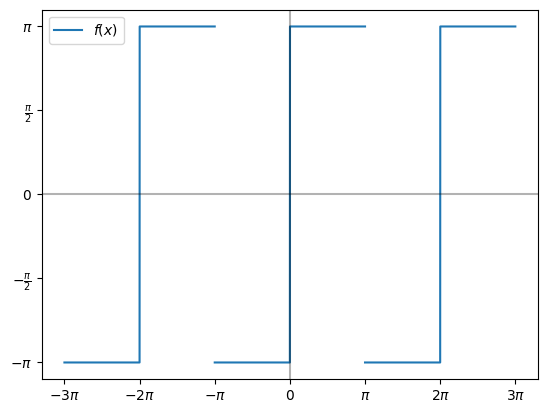

In [13]:
f = vectorize(f)

plt.plot(x - 2 * pi, f(x), 'C0')
plt.plot(x + 2 * pi, f(x), 'C0')
plt.plot(x, f(x), 'C0', label=r'$f(x)$')
plt.xticks([-3*pi, -2*pi, -pi, 0, pi, 2 * pi, 3 * pi],
          [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", r"$0$", r"$\pi$", r"$2\pi$", r"$3\pi$"])
plt.yticks([-pi, -pi / 2, 0, pi / 2, pi], [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.legend(loc='upper left')
plt.axhline(color='black', alpha=0.3)
plt.axvline(color='black', alpha=0.3)
plt.show()

 Στην συνέχεια, υπολογίζονται οι συντελεστές της σειράς Fourier αλλά και τα μερικά αθροίσματα της σειράς και παραλληλίζω την γραφική παράσταση της $f$ με την $S[f](x)$ για να επιβεβαιώσω ότι πραγματικά συγκλίνουν στις "μορφές".

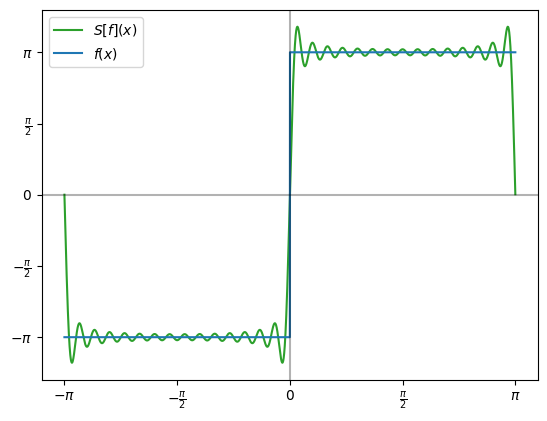

In [14]:
y = fourier_series(x, f)

plt.plot(x, y, 'C2', label=r'$S[f](x)$')
plt.plot(x, f(x), 'C0', label=r'$f(x)$')
plt.xticks([-pi, -pi / 2, 0, pi / 2, pi], [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.yticks([-pi, -pi / 2, 0, pi / 2, pi], [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.legend(loc='upper left')
plt.axhline(color='black', alpha=0.3)
plt.axvline(color='black', alpha=0.3)
plt.show()

Όπως φαίνεται και στο παραπάνω σχήμα (\ref{fig:sf1}), η δυο συναρτήσεις ταυτίζονται για $x \in (-\pi, \pi)$. Όταν το $x = -\pi$ ή $x = \pi$ δηλ. στα σημεία της ασυνέχειας παρουσιάζονται μεγάλες ταλαντώσεις, παρατηρείται δηλαδή το φαινόμενο Gibbs.

Ας εξετάσουμε και τη σειρά Fourier της συνάρτησης

\begin{equation}
    g(x) =
    \begin{cases}
        \cos(x), & 0 < x \leq \pi \\
        0, & −\pi < x \leq 0.
    \end{cases}
\end{equation}

Η επέκταση της $g$ στο $[-\pi, \pi]$ είναι

\begin{equation}
    \tilde{g} =
    \begin{cases}
        \cos(x), & x \in (0, \pi] \text{ ή } x = -\pi \\
        0, & x \in (−\pi, 0].
    \end{cases}
\end{equation}

In [15]:
def g(x: float) -> float:
    if -pi < x <= 0:
        return 0
    elif 0 < x <= pi or x == -pi:
        return cos(x)

H περίοδος της $f$ είναι $2\pi$ και για διάστημα τριών περιόδων η επέκταση της είναι

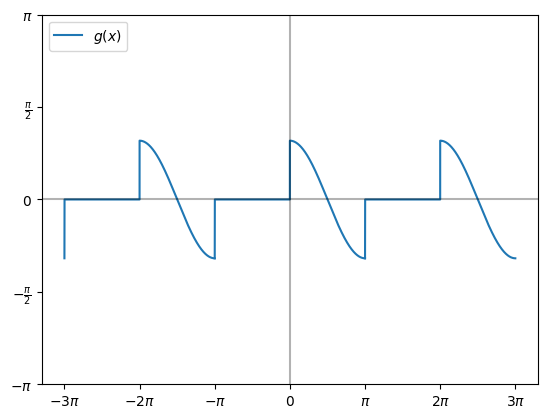

In [16]:
g = vectorize(g)

plt.plot(x - 2 * pi, g(x), 'C0')
plt.plot(x + 2 * pi, g(x), 'C0')
plt.plot(x, g(x), 'C0', label=r'$g(x)$')
plt.xticks([-3 * pi, -2 * pi, -pi, 0, pi, 2 * pi, 3 * pi],
          [r"$-3\pi$", r"$-2\pi$", r"$-\pi$", r"$0$", r"$\pi$", r"$2\pi$", r"$3\pi$"])
plt.yticks([-pi, -pi / 2, 0, pi / 2, pi], [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.legend(loc='upper left')
plt.axhline(color='black', alpha=0.3)
plt.axvline(color='black', alpha=0.3)
plt.show()

Όπως και προηγουμένως, υπολογίζονται οι συντελεστές της σειράς Fourier αλλά και τα μερικά αθροίσματα της σειράς. Επιπλέον, παραλληλίζω την γραφική παράσταση της $f$ με την $S[f](x)$ και παρατηρώ και πάλι το φαινόμενο Gibbs στα σημεία της ασυνέχειας.

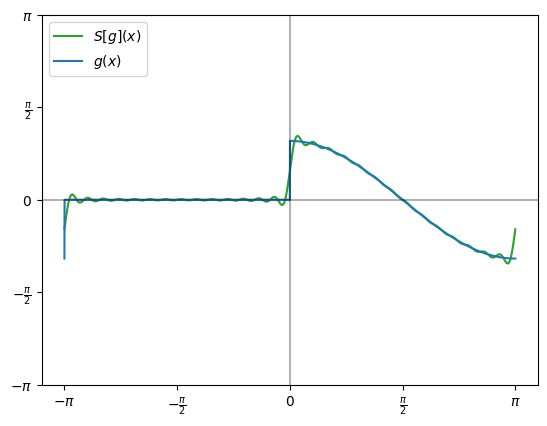

In [17]:
y = fourier_series(x, g)

plt.plot(x, y, 'C2', label=r'$S[g](x)$')
plt.plot(x, g(x), 'C0', label=r'$g(x)$')
plt.xticks([-pi, -pi / 2, 0, pi / 2, pi], [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.yticks([-pi, -pi / 2, 0, pi / 2, pi], [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.legend(loc='upper left')
plt.axhline(color='black', alpha=0.3)
plt.axvline(color='black', alpha=0.3)
plt.show()